# 추가된 Feature을 이미지 Shape로 변경하여 CNN 적용

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import FinanceDataReader as fdr

import os

In [5]:
nasdaq = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/data/nasdaq.csv', index_col=0, parse_dates=True)
snp = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/data/snp500.csv', index_col=0, parse_dates=True)
ftse = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/data/ftse.csv', index_col=0, parse_dates=True)
dax = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/data/dax.csv', index_col=0, parse_dates=True)
nikkei = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/data/nikkei.csv', index_col=1, parse_dates=True)
hangseng = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/data/hang.csv', index_col=0, parse_dates=True)
sanghai = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/data/sanghai.csv', index_col=0, parse_dates=True)
vix = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/data/vix.csv', index_col=0, parse_dates=True)
kospi = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/data/kospi.csv', index_col=0, parse_dates=True)
kosdaq = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/data/kosdaq.csv', index_col=0, parse_dates=True)

In [6]:
nasdaq.sort_index(inplace=True)
snp.sort_index(inplace=True)
ftse.sort_index(inplace=True)
dax.sort_index(inplace=True)
nikkei.sort_index(inplace=True)
hangseng.sort_index(inplace=True)
sanghai.sort_index(inplace=True)
kospi.sort_index(inplace=True)
kosdaq.sort_index(inplace=True)

In [7]:
nasdaq['Close'] = nasdaq.Close.apply(lambda x : pd.to_numeric(x.replace(',', '')))
dax['Close'] = dax.Close.apply(lambda x : pd.to_numeric(x.replace(',', '')))
nikkei['Close'] = nikkei['종가'].apply(lambda x : pd.to_numeric(x.replace(',', '')))
hangseng['Close'] = hangseng.Close.apply(lambda x : pd.to_numeric(x.replace(',', '')))

nasdaq['Open'] = nasdaq.Open.apply(lambda x : pd.to_numeric(x.replace(',', '')))
dax['Open'] = dax.Open.apply(lambda x : pd.to_numeric(x.replace(',', '')))
nikkei['Open'] = nikkei['오픈'].apply(lambda x : pd.to_numeric(x.replace(',', '')))
hangseng['Open'] = hangseng.Open.apply(lambda x : pd.to_numeric(x.replace(',', '')))

nasdaq['High'] = nasdaq.High.apply(lambda x : pd.to_numeric(x.replace(',', '')))
dax['High'] = dax.High.apply(lambda x : pd.to_numeric(x.replace(',', '')))
nikkei['High'] = nikkei['고가'].apply(lambda x : pd.to_numeric(x.replace(',', '')))
hangseng['High'] = hangseng.High.apply(lambda x : pd.to_numeric(x.replace(',', '')))

nasdaq['Low'] = nasdaq.Low.apply(lambda x : pd.to_numeric(x.replace(',', '')))
dax['Low'] = dax.Low.apply(lambda x : pd.to_numeric(x.replace(',', '')))
nikkei['Low'] = nikkei['저가'].apply(lambda x : pd.to_numeric(x.replace(',', '')))
hangseng['Low'] = hangseng.Low.apply(lambda x : pd.to_numeric(x.replace(',', '')))

In [8]:
df_list = [nasdaq, snp, ftse, dax, nikkei, hangseng, sanghai, kospi]

In [9]:
df1 = []
df2 = []
df3 = []
df4 = []
df5 = []
df6 = []
df7 = []
df8 = []
df9 = []
for df in df_list:
    df1.append((df.Close - df.Close.shift(1)) / df.Close.shift(1))
    df2.append((df.Close - df.Open) / df.Open)
    df3.append((df.High - df.Low) / df.Low)
    df4.append((df.High - df.Close) / df.Close)
    df5.append((df.Low - df.Close) / df.Close)
    df6.append((df.Open - df.Open.shift(1)) / df.Open.shift(1))
    df7.append((df.Open - df.Close.shift(1)) / df.Close.shift(1))
    df8.append((df.High - df.High.shift(1)) / df.High.shift(1))
    df9.append((df.Low - df.Low.shift(1)) / df.Low.shift(1))

In [10]:
df1 = pd.concat(df1, axis=1)
df2 = pd.concat(df2, axis=1)
df3 = pd.concat(df3, axis=1)
df4 = pd.concat(df4, axis=1)
df5 = pd.concat(df5, axis=1)
df6 = pd.concat(df6, axis=1)
df7 = pd.concat(df7, axis=1)
df8 = pd.concat(df8, axis=1)
df9 = pd.concat(df9, axis=1)

tail = '_1'
col_names = [f'NASDAQ{tail}', f'S&P500{tail}', f'FTSE{tail}', f'DAX{tail}',
             f'NIKKEI{tail}', f'HANGSENG{tail}', f'SANGHAI{tail}', f'KOSPI{tail}']
df1.columns = col_names

tail = '_2'
col_names = [f'NASDAQ{tail}', f'S&P500{tail}', f'FTSE{tail}', f'DAX{tail}',
             f'NIKKEI{tail}', f'HANGSENG{tail}', f'SANGHAI{tail}', f'KOSPI{tail}']
df2.columns = col_names

tail = '_3'
col_names = [f'NASDAQ{tail}', f'S&P500{tail}', f'FTSE{tail}', f'DAX{tail}',
             f'NIKKEI{tail}', f'HANGSENG{tail}', f'SANGHAI{tail}', f'KOSPI{tail}']
df3.columns = col_names

tail = '_4'
col_names = [f'NASDAQ{tail}', f'S&P500{tail}', f'FTSE{tail}', f'DAX{tail}',
             f'NIKKEI{tail}', f'HANGSENG{tail}', f'SANGHAI{tail}', f'KOSPI{tail}']
df4.columns = col_names

tail = '_5'
col_names = [f'NASDAQ{tail}', f'S&P500{tail}', f'FTSE{tail}', f'DAX{tail}',
             f'NIKKEI{tail}', f'HANGSENG{tail}', f'SANGHAI{tail}', f'KOSPI{tail}']
df5.columns = col_names

tail = '_6'
col_names = [f'NASDAQ{tail}', f'S&P500{tail}', f'FTSE{tail}', f'DAX{tail}',
             f'NIKKEI{tail}', f'HANGSENG{tail}', f'SANGHAI{tail}', f'KOSPI{tail}']
df6.columns = col_names

tail = '_7'
col_names = [f'NASDAQ{tail}', f'S&P500{tail}', f'FTSE{tail}', f'DAX{tail}',
             f'NIKKEI{tail}', f'HANGSENG{tail}', f'SANGHAI{tail}', f'KOSPI{tail}']
df7.columns = col_names

tail = '_8'
col_names = [f'NASDAQ{tail}', f'S&P500{tail}', f'FTSE{tail}', f'DAX{tail}',
             f'NIKKEI{tail}', f'HANGSENG{tail}', f'SANGHAI{tail}', f'KOSPI{tail}']
df8.columns = col_names

tail = '_9'
col_names = [f'NASDAQ{tail}', f'S&P500{tail}', f'FTSE{tail}', f'DAX{tail}',
             f'NIKKEI{tail}', f'HANGSENG{tail}', f'SANGHAI{tail}', f'KOSPI{tail}']
df9.columns = col_names

In [11]:
final_df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9], axis=1)

In [12]:
final_df = pd.merge(pd.DataFrame(pd.date_range('2001-01-01', '2021-11-11')).set_index(0),final_df,how='outer', left_index=True, right_index=True)

In [13]:
final_df.fillna(0, inplace=True)

In [14]:
final_df = final_df.loc['2001-01-03' : '2021-11-11']

In [15]:
y = (kospi.Open - kospi.Close.shift(1)) / kospi.Close.shift(1)

In [16]:
y.name = 'y'
y = pd.merge(pd.DataFrame(pd.date_range('2001-01-01', '2021-11-11')).set_index(0),y,how='outer', left_index=True, right_index=True)

In [17]:
y_df = y.loc['2001-01-03' : '2021-11-11']

In [18]:
y_df.head(10)

,y
2001-01-03,-0.015760
2001-01-04,0.057726
2001-01-05,0.002724
2001-01-06,NaN
2001-01-07,NaN
2001-01-08,-0.012275
2001-01-09,-0.004773
2001-01-10,-0.005577
2001-01-11,0.013284
2001-01-12,0.030545


In [19]:
holiday_index = y_df[y_df.y.isnull()].index

In [20]:
from datetime import timedelta

In [21]:
# N번째 휴일의 시작 날짜, 처음 값을 0번째 인덱스 값으로 지정.
start_day = holiday_index[0]

# N번째 휴일의 종료 날짜
end_day = holiday_index[0]

# 휴일기간을 담기위한 목록
holiday_list = []

for i in range(1, len(holiday_index)) :
    
    # N번째 휴일 날짜를 N-1번째 휴일 날짜와 비교해서, 날짜의 차이가 1일이면
    if (holiday_index[i] - holiday_index[i-1]) == timedelta(days=1) :
        
        # 연속된 휴일로 보고 휴일 종료 날짜를 +1일
        end_day = holiday_index[i]
        
    # N번째 휴일 날짜와 N-1번째 휴일 날짜를 비교해서, 날짜의 차이가 1일이 아니면 -> 새로운 휴일의 시작으로 보고 시작과 끝을 바꿔줌.
    else :
        
        # 새로운 휴일을 시작하기 전에 정해진(이전 휴일기간)의 시작과 끝 날짜를 리스트에 담아줌.
        holiday_list.append((start_day, end_day))
        
        # 새로운 휴일 시작 날짜를 새로 지정
        start_day = holiday_index[i]
        
        # 새로운 휴일 종료 날짜도 새로 지정
        end_day = holiday_index[i]

In [22]:
one_day = timedelta(days=1)

X = []
y = []

temp = None

for idx in range(len(holiday_list)) :
    
    #휴일 시작일
    holiday_start = holiday_list[idx][0]
    
    #휴일 종료일
    holiday_end = holiday_list[idx][1]
    
    # 타겟 날짜(휴일 다음날의 날짜)
    target_day = holiday_end + one_day
    
    # 휴일기간 및 D+1일 지수 변동 데이터
    n_holiday = final_df.loc[holiday_start - one_day : holiday_end]
    
#     if len(n_holiday) > 3:
#         temp = n_holiday
#         break
    
    # 휴일 기간 동안 지수들의 누적 변동률
    n_holiday_change = (n_holiday + 1).cumprod() - 1

    # KOSPI, KOSDAQ을 제외한 지수들의 누적수익률 데이터
    X_data = n_holiday_change.loc[holiday_end].apply(lambda x : round(x, 4))

    # D+1일 KOSPI의 실제 수익률 y
    y_data = y_df.loc[target_day].apply(lambda x : round(x, 4))['y']

    X.append(X_data.values)
    y.append(y_data)

In [23]:
X = np.array(X)
y = np.array(y)

## CNN적용을 위해 X 값 reshape

In [24]:
X.shape

(1188, 72)

In [25]:
X[0]

array([-0.062 , -0.0262,  0.002 ,  0.0009,  0.    ,  0.014 ,  0.0037,
        0.0409, -0.0643, -0.0262,  0.002 , -0.0002,  0.0076,  0.0061,
        0.0036,  0.0381,  0.0748,  0.0308,  0.0137,  0.0223,  0.0161,
        0.0143,  0.0054,  0.0468,  0.0694,  0.0281,  0.0067,  0.0161,
        0.0057,  0.003 ,  0.    ,  0.001 , -0.0051, -0.0026, -0.007 ,
       -0.006 , -0.0103, -0.0111, -0.0053, -0.0438, -0.0081, -0.0106,
        0.0241, -0.0094,  0.    ,  0.0195, -0.0037,  0.0145,  0.0025,
        0.    ,  0.    ,  0.0011,  0.    ,  0.0078,  0.0001,  0.0027,
       -0.0265, -0.0115,  0.0072, -0.0109,  0.    ,  0.0119, -0.001 ,
        0.0251, -0.0606, -0.0257,  0.0191, -0.002 ,  0.    ,  0.0143,
        0.0004,  0.0082])

In [26]:
X_cnn = (X * 1000).reshape(-1, 8,9,1)

In [31]:
X_cnn[0]

array([[[-62. ],
        [-26.2],
        [  2. ],
        [  0.9],
        [  0. ],
        [ 14. ],
        [  3.7],
        [ 40.9],
        [-64.3]],

       [[-26.2],
        [  2. ],
        [ -0.2],
        [  7.6],
        [  6.1],
        [  3.6],
        [ 38.1],
        [ 74.8],
        [ 30.8]],

       [[ 13.7],
        [ 22.3],
        [ 16.1],
        [ 14.3],
        [  5.4],
        [ 46.8],
        [ 69.4],
        [ 28.1],
        [  6.7]],

       [[ 16.1],
        [  5.7],
        [  3. ],
        [  0. ],
        [  1. ],
        [ -5.1],
        [ -2.6],
        [ -7. ],
        [ -6. ]],

       [[-10.3],
        [-11.1],
        [ -5.3],
        [-43.8],
        [ -8.1],
        [-10.6],
        [ 24.1],
        [ -9.4],
        [  0. ]],

       [[ 19.5],
        [ -3.7],
        [ 14.5],
        [  2.5],
        [  0. ],
        [  0. ],
        [  1.1],
        [  0. ],
        [  7.8]],

       [[  0.1],
        [  2.7],
        [-26.5],
        [-11.5],
  

In [188]:
X_cnn.shape

(1188, 6, 4, 3)

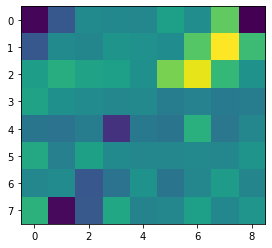

In [218]:
plt.imshow(X_cnn[0])

## CNN 적용

In [225]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cnn,y, test_size=0.1)

In [657]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [650]:
leaky_relu = tf.nn.leaky_relu
# leaky_relu = 'relu'

model = models.Sequential()

model.add(layers.Input(shape=(8,9,1)))
# model.add(layers.experimental.preprocessing.Rescaling(1./255))
model.add(tf.keras.layers.BatchNormalization())            

model.add(layers.Conv2D(16, kernel_size=(2, 2), activation='relu'))
model.add(layers.Conv2D(32, kernel_size=(2, 2), activation='relu'))
model.add(layers.Conv2D(64, kernel_size=(2, 2), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

model.summary()

Model: "sequential_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_104 (Bat (None, 8, 9, 1)           4         
_________________________________________________________________
conv2d_224 (Conv2D)          (None, 7, 8, 16)          80        
_________________________________________________________________
conv2d_225 (Conv2D)          (None, 6, 7, 32)          2080      
_________________________________________________________________
conv2d_226 (Conv2D)          (None, 5, 6, 64)          8256      
_________________________________________________________________
flatten_103 (Flatten)        (None, 1920)              0         
_________________________________________________________________
dense_259 (Dense)            (None, 15)                28815     
_________________________________________________________________
dense_260 (Dense)            (None, 1)              

In [651]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer='adam', loss='mean_squared_error')

In [652]:
%%time
model.fit(X_train, y_train, validation_split=0.3, epochs=30, batch_size=10)

Epoch 1/30


2021-11-24 18:26:17.340953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - ETA: 0s - loss: 5.2518e-04

2021-11-24 18:26:18.270179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 1s 11ms/step - loss: 5.2518e-04 - val_loss: 1.2671e-04
Epoch 2/30
75/75 [==============================] - 1s 8ms/step - loss: 6.0111e-05 - val_loss: 4.9483e-05
Epoch 3/30
75/75 [==============================] - 1s 7ms/step - loss: 4.3663e-05 - val_loss: 4.8545e-05
Epoch 4/30
75/75 [==============================] - 0s 6ms/step - loss: 3.9352e-05 - val_loss: 4.7371e-05
Epoch 5/30
75/75 [==============================] - 0s 6ms/step - loss: 3.3695e-05 - val_loss: 4.4678e-05
Epoch 6/30
75/75 [==============================] - 0s 7ms/step - loss: 3.0758e-05 - val_loss: 4.5850e-05
Epoch 7/30
75/75 [==============================] - 0s 7ms/step - loss: 2.8145e-05 - val_loss: 4.3534e-05
Epoch 8/30
75/75 [==============================] - 0s 6ms/step - loss: 2.6071e-05 - val_loss: 4.2892e-05
Epoch 9/30
75/75 [==============================] - 0s 6ms/step - loss: 2.4272e-05 - val_loss: 4.6411e-05
Epoch 10/30
75/75 [==============================] - 0s 

0.7023515218827052


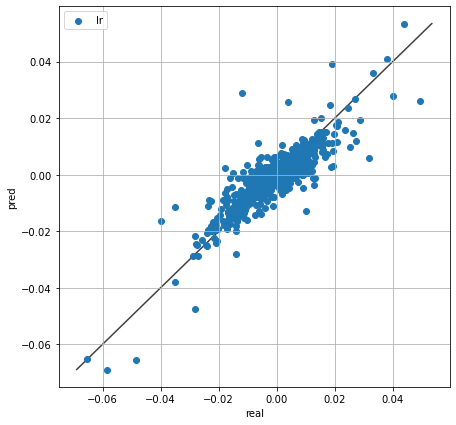

In [656]:
from sklearn.metrics import r2_score


train_preds = [v[0] for v in model.predict(X_train)]


print(r2_score(train_preds, list(y_train)))


score_dict = {
    'dl' : train_preds,
    'real' : y_train
}

pred_df = pd.DataFrame(score_dict)

lims = [
    np.min([pred_df.min().min(), pred_df.min().min()]),  # min of both axes
    np.max([pred_df.max().max(), pred_df.max().max()]),  # max of both axes
]

# now plot both limits against eachother
plt.figure(figsize=(7,7))
plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.scatter(pred_df.real, pred_df.dl, marker='o', label='lr')
plt.xlabel('real')
plt.ylabel('pred')
plt.grid()
plt.legend()
plt.show()

0.2243912704405422


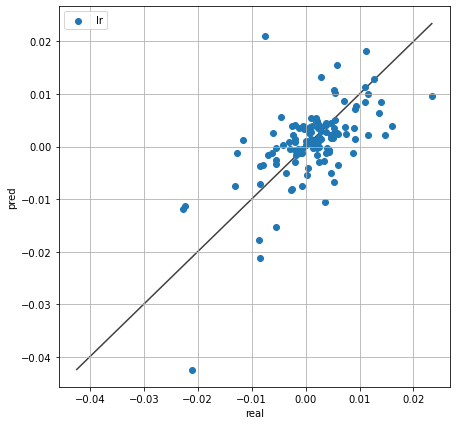

In [655]:
from sklearn.metrics import r2_score


preds = [v[0] for v in model.predict(X_test)]


print(r2_score(preds, list(y_test)))


score_dict = {
    'dl' : preds,
    'real' : y_test
}

pred_df = pd.DataFrame(score_dict)

lims = [
    np.min([pred_df.min().min(), pred_df.min().min()]),  # min of both axes
    np.max([pred_df.max().max(), pred_df.max().max()]),  # max of both axes
]

# now plot both limits against eachother
plt.figure(figsize=(7,7))
plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.scatter(pred_df.real, pred_df.dl, marker='o', label='lr')
plt.xlabel('real')
plt.ylabel('pred')
plt.grid()
plt.legend()
plt.show()